# Protien Sequence Classification

## Abstract
The CRISPR-Cas systems are made up of lustered regularly interspaced short palindromic repeats (CRISPR) and their associated (Cas) proteins, which play a critical role in the adaptive immune system of prokaryotes against invasive foreign components. CRISPR-Cas technologies have also been built to permit target gene editing in eukaryotic genomes in recent years. Cas protein, as one of the most important components of the CRISPR-Cas system, is indispensable. The kind of CRISPR-Cas system is determined by the effector module, which is made up of Cas proteins. Effective Cas protein prediction and identification can aid researchers in determining the kind of CRISPR-Cas system. Furthermore, the class 2 CRISPR-Cas systems are increasingly being used in genome editing. The discovery of the Cas protein will aid in the development of more genome editing possibilities.


## 1. Introduction

Proteins (https://en.wikipedia.org/wiki/Protein) are large, complex biomolecules that play many critical roles inbiological bodies. Proteins are made up of one or more long chains of amino acids(https://en.wikipedia.org/wiki/Amino_acid) sequences. These Sequence are the arrangement of amino acids in a protein held together by peptide bonds(https://en.wikipedia.org/wiki/Peptide_bond). Proteins can be made from 20 (https://www.hornetjuice.com/amino-acids-types/) different kinds of amino acids, and the structure and function of each protein are determined by the kinds of amino acids used to make it and how they are arranged. Understanding this relationship between amino acid sequence and protein function is a long-standing problem in moleculer biology with far-reaching scientific implications. Can we use deep learning that learns the relationship between unaligned amino acid sequences and their functional annotations.

#### Problem Description
Based on the Fasta Dataset, classification of a protein's amino acid sequence into one of the protein family categories.
In other words, the aim is to determine which class a protein domain belongs to based on its amino acid sequence.
 

### 1.2 Objective

Predict protein family accession from its amino acids sequence with high accuracy.

Avoding latency concerns



# 2. Data Exploration


### 2.1 Data Overview


   FASTA format is a text-based format for representing either nucleotide sequences or peptide sequences, in which base pairs or amino acids are represented using single-letter codes. A sequence in FASTA format begins with a single-line description, followed by lines of sequence data. The description line is distinguished from the sequence data by a greater-than (">") symbol in the first column. It is recommended that all lines of text be shorter than 80 characters in length.
     
     
### 2.1.1 An example sequence in FASTA format is:

    >gi|186681228|ref|YP_001864424.1| phycoerythrobilin:ferredoxin oxidoreductaseMNSERSDVTLYQPFLDYAIAYMRSRLDLEPYPIPTGFESNSAVVGKGKNQEEVVTTSYAFQTAKLRQIRAAHVQGGNSLQVLNFVIFPHLNYDLPFFGADLVTLPGGHLIALDMQPLFRDDSAYQAKYTEPILPIFHAHQQHLSWGGDFPEEAQPFFSPAFLWTRPQETAVVETQVFAAFKDYLKAYLDFVEQAEAVTDSQNLVAIKQAQLRYLRYRAEKDPARGMFKRFYGAEWTEEYIHGFLFDLERKLTVVK
    
Sequences are expected to be represented in the standard IUB/IUPAC amino 
acid and nucleic acid codes, with these exceptions:

1. Lower-case letters are accepted and are mapped into upper-case;
2. A single hyphen or dash can be used to represent a gap of indeterminate 
   length;
3. in amino acid sequences, U and * are acceptable letters (see below).
4. any numerical digits in the query sequence should either be removed or
    replaced by appropriate letter codes (e.g., N for unknown nucleic acid 
    residue or X for unknown amino acid residue).


The nucleic acid codes are:

        A --> adenosine           M --> A C (amino)
        C --> cytidine            S --> G C (strong)
        G --> guanine             W --> A T (weak)
        T --> thymidine           B --> G T C
        U --> uridine             D --> G A T
        R --> G A (purine)        H --> A C T
        Y --> T C (pyrimidine)    V --> G C A
        K --> G T (keto)          N --> A G C T (any)
                                  -  gap of indeterminate length
                                  
The accepted amino acid codes are:


    A ALA alanine                         P PRO proline
    B ASX aspartate or asparagine         Q GLN glutamine
    C CYS cystine                         R ARG arginine
    D ASP aspartate                       S SER serine
    E GLU glutamate                       T THR threonine
    F PHE phenylalanine                   U     selenocysteine
    G GLY glycine                         V VAL valine
    H HIS histidine                       W TRP tryptophan
    I ILE isoleucine                      Y TYR tyrosine
    K LYS lysine                          Z GLX glutamate or glutamine
    L LEU leucine                         X     any
    M MET methionine                      *     translation stop
    N ASN asparagine                      -     gap of indeterminate length
    
With respect to the data set

sequence : These are usually the input features to the model. Amino acid sequence for this domain.There are 20 very common amino acids (frequency > 1,000,000), and 4 amino acids that are quite uncommon: X, U, B, O, Z.

Entry name : These are usually the labels for the model. Accession number in form CS12A_ACISB, where first term is defined as classs

Protein name : Sequence name, in the form "uniprot_accession_id/start_index-end_index".

Length : It contains the length of the sequence

Entry: One word name for family

There were 4 folder one named as CAS and other 3 as Non-CAS. Firstly selecting the fasta format data, dividing accordingly to there attributes by a package called Biopython and alligning the sequences with respect to length entry name and protien names. After Preprocessing converting data into csv and saving it as the same name with file extension as .csv file.Repeating the process for all the files and merging all the csv files into one data.csv file
    

### 2.1.2 Data split

We have been provided with already done random split(train, val, test) of fasta dataset.

Train - 80% (For training the models).

Valid - 10% (For hyperparameter tuning/model validation).

Test - 10% (For acessing the model performance).


## 3. Predicting Methods

### 3.1  Bidirectional LSTM

Bidirectional long-short term memory(Bidirectional LSTM) is the process of making any neural network o have the sequence information in both directions backwards (future to past) or forward(past to future).

#### The workings of LSTMs
The LSTM, or Long Short-Term Memory network, is a form of recurrent neural network (RNN) that was created to overcome the problem of disappearing gradients. Because of this issue, which is created by gradient chaining during error backpropagation, the most upstream layers of a neural network learn very slowly.

It's particularly troublesome when your neural network is recurrent, because the sort of backpropagation needed entails unrolling the network for each input token, effectively chaining copies of the same model. The vanishing gradients problem gets worse as the sequence gets longer. As a result, we no longer employ traditional or vanilla RNNs as frequently.

i.By separating memory from hidden outputs, LSTMs solve this problem. An LSTM is made up of memory cells, one of which is shown in the illustration below. As you can see, the output from the preceding layer [latex]h[t-1][/latex] is segregated from the memory, which is labeled [latex]c[/latex]. The memory interacts with the past output and present input through three parts, or gates:

ii.The first piece is called the forget gate. It uses a Sigmoid ([latex]sigma[/latex]) function to combine the previous output with the current input, then multiplies the result with memory. As a result, certain short-term items are erased from memory.

iii.The third and final portion is the output gate. It multiplies a Tanh-normalized representation from memory with a Sigmoid triggered mix of current input and prior output. The output is then shown and utilized in the following cell, which is a duplicate of the current one with the identical settings.

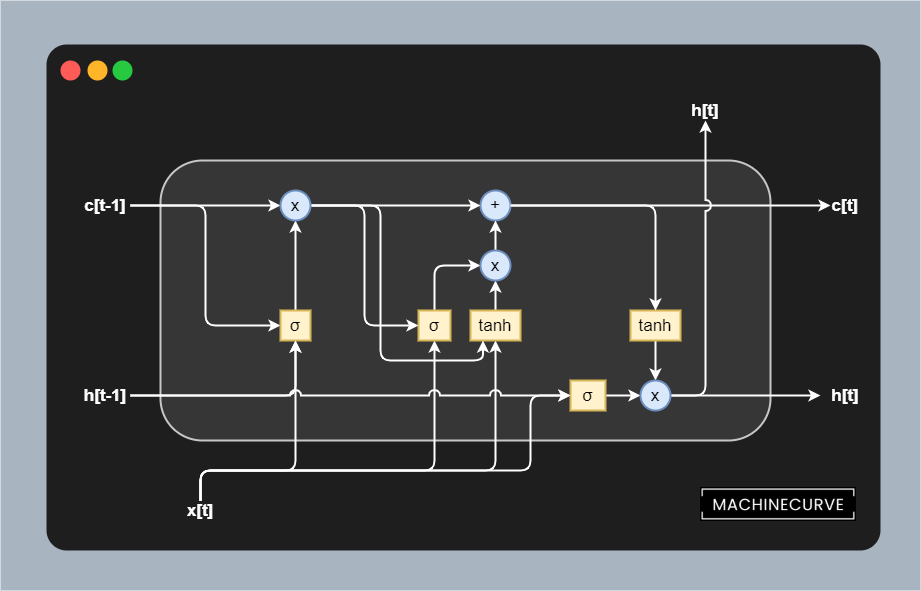

#### How unidirectionality can limit your LSTM

Suppose that you are processing the sequence [latex]\text{I go eat now}[/latex] through an LSTM for the purpose of translating it into French. Recall that processing such data happens on a per-token basis; each token is fed through the LSTM cell which processes the input token and passes the hidden state on to itself. When unrolled (as if you utilize many copies of the same LSTM model), this process looks as follows:

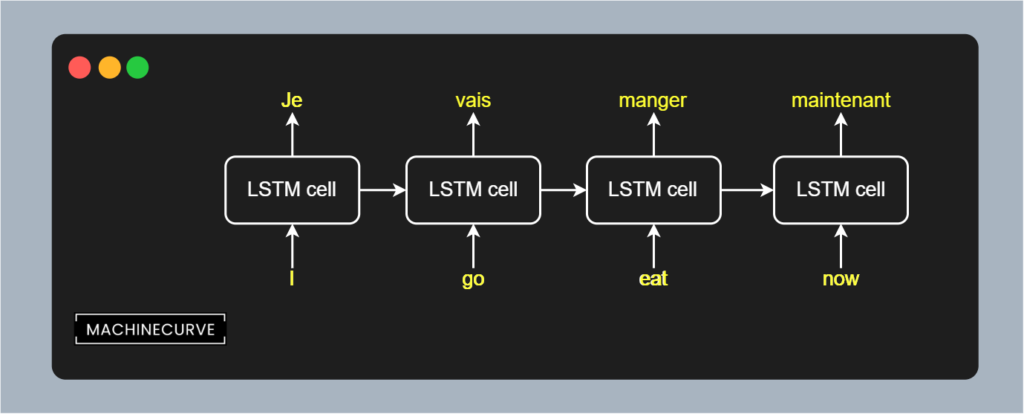
This immediately shows that LSTMs are unidirectional. In other words, the sequence is processed into one direction; here, from left to right. This makes common sense, as - except for a few languages - we read and write in a left-to-right fashion. For translation tasks, this is therefore not a problem, because you don't know what will be said in the future and hence have no business about knowing what will happen after your current input word.

#### From unidirectional to bidirectional LSTMs

In some circumstances, a Bidirectional LSTM would be preferable. Sequences are processed both left-to-right and right-to-left in this type of network. In other words, [latex]textI go eat now[/latex] is processed as [latex]textI rightarrow texgo rightarrow texeat rightarrow texnow[/latex] and [latex]textI leftarrow texgo leftarrow texeat leftarrow texeat leftarrow texnow[/latex].

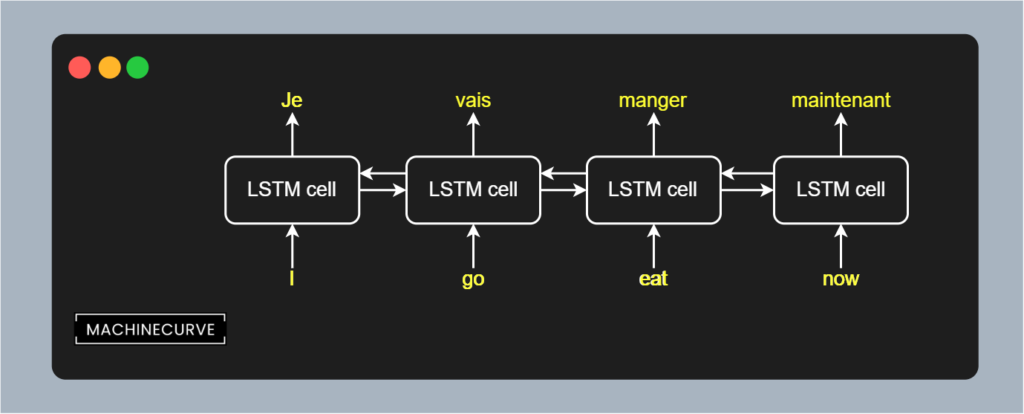

While conceptually bidirectional LSTMs work in a bidirectional fashion, they are not bidirectional in practice. Rather, they are just two unidirectional LSTMs for which the output is combined. Outputs can be combined in multiple ways (TensorFlow, n.d.):

Vector summation. Here, the output equals [latex]\text{LSTM}_\rightarrow + \text{LSTM}_\leftarrow[/latex].
Vector averaging. Here, the output equals [latex]\frac{1}{2}(\text{LSTM}_\rightarrow + \text{LSTM}_\leftarrow)[/latex]
Vector multiplication. Here, the output equals [latex]\text{LSTM}_\rightarrow \times \text{LSTM}_\leftarrow[/latex].
Vector concatenation. Here, the output vector is twice the dimensionality of the input vectors, because they are concatenated rather than combined.


#### Constructing a bidirectional LSTM involves the following steps...

1.Specifying the model imports. As you can see, we import a lot of TensorFlow modules. We're using the provided IMDB dataset for educational purposes, Embedding for learned embeddings, the Dense layer type for classification, and LSTM/Bidirectional for constructing the bidirectional LSTM. Binary crossentropy loss is used together with the Adam optimizer for optimization. With pad_sequences, we can ensure that our inputs are of equal length. Finally, we'll use Sequential - the Sequential API - for creating the initial model.

2.Listing the configuration options. I always think it's useful to specify all the configuration options before using them throughout the code. It simply provides the overview that we need. They are explained in more detail in the tutorial about LSTMs.

3.Loading and preparing the dataset. We use imdb.load_data(...) for loading the dataset given our configuration options, and use pad_sequences to ensure that sentences that are shorter than our maximum limit are padded with zeroes so that they are of equal length. The IMDB dataset can be used for sentiment analysis: we'll find out whether a review is positive or negative.

4.Defining the Keras model. In other words, constructing the skeleton of our model. Using Sequential, we initialize a model, and stack the Embedding, Bidirectional LSTM, and Dense layers on top of each other.

5.Compiling the model. This actually converts the model skeleton into a model that can be trained and used for predictions. Here, we specify the optimizer, loss function and additional metrics.

6.Generating a summary. This allows us to inspect the model in more detail.

7.Training and evaluating the model. With model.fit(...), we start the training process using our training data, with subsequent evaluation on our testing data using model.evaluate(...).

### 3.2 ProtCNN

This model uses residual blocks inspired from ResNet architecture which also includes dilated convolutions offering larger receptive field without increasing number of model parameters.

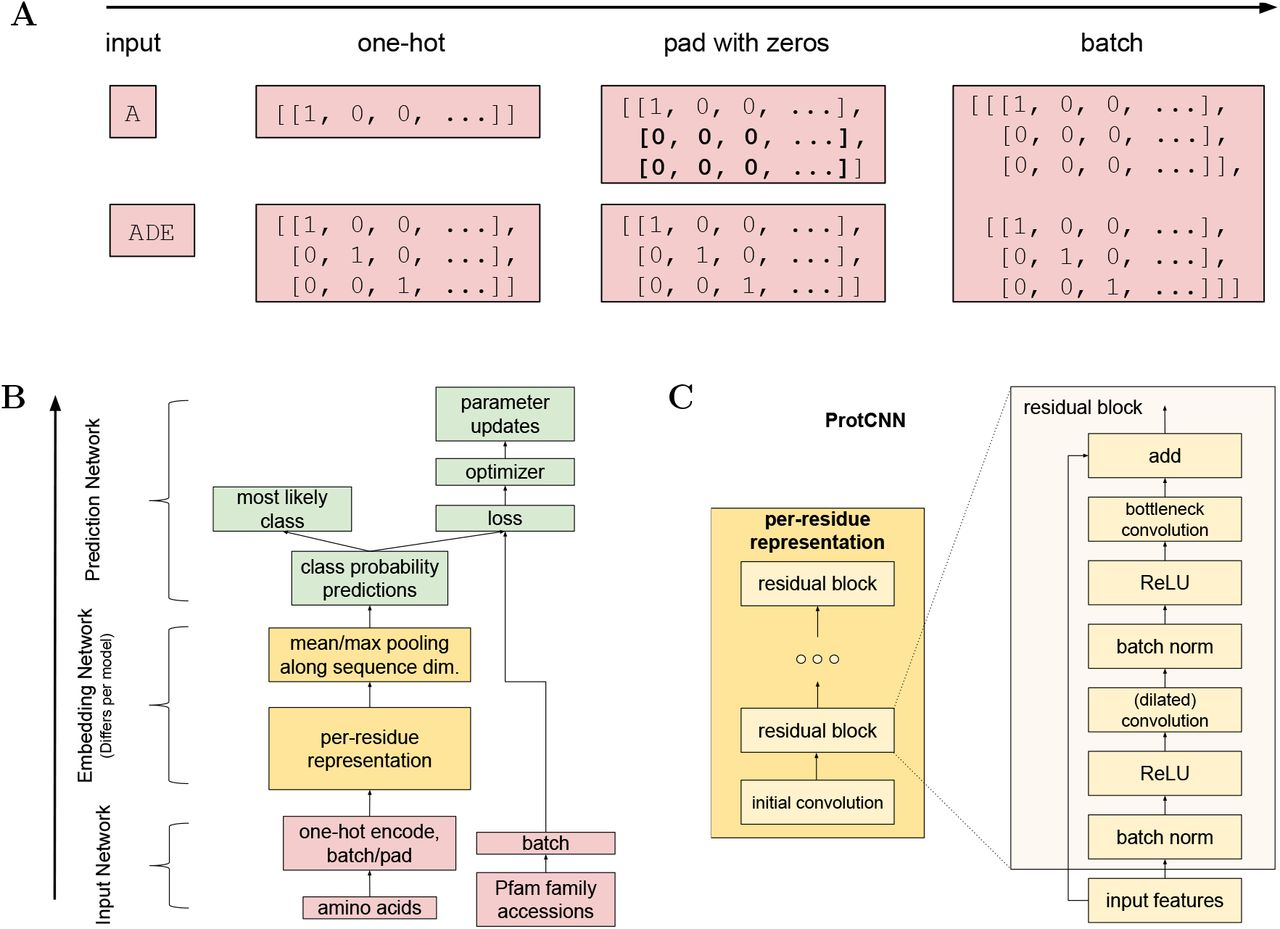

Understanding the relationship between amino acid sequence and protein function is a long-standing problem in molecular biology with far-reaching scientific implications. Despite six decades of progress, state-of-the-art techniques cannot annotate 1/3 of microbial protein sequences, hampering our ability to exploit sequences collected from diverse organisms. To address this, we report a deep learning model that learns the relationship between unaligned amino acid sequences and their functional classification across all 17929 families of the Pfam database. Using the Pfam seed sequences we establish a rigorous benchmark assessment and find a dilated convolutional model that reduces the error of both BLASTp and pHMMs by a factor of nine. Using 80% of the full Pfam database we train a protein family predictor that is more accurate and over 200 times faster than BLASTp, while learning sequence features it was not trained on such as structural disorder and transmembrane helices. Our model co-locates sequences from unseen families in embedding space, allowing sequences from novel families to be accurately annotated. These results suggest deep learning models will be a core component of future protein function prediction tools.

Deep learning provides an opportunity to bypass these bottlenecks and directly predict protein functional annotations from sequence data. In these frameworks, a single model learns the distribution of multiple classes simultaneously, and can be rapidly evaluated. Besides providing highly accurate models, the intermediate layers of a deep neural network trained with supervision can capture high-level structure of the data through learned representations [13]. These can be leveraged for exploratory data analysis or supervised learning on new tasks, in particular those with limited data. For example, novel classes can be identified from just a few examples through few-shot learning.

To interrogate what ProtCNN learns about the natural amino acids, we add a 5-dimensional trainable representation between the one-hot amino acid input and the embedding network (see Methods for details), and retrain our ProtCNN model on the same unaligned sequence data , achieving the same performance. The structural similarities between these matrices suggest that ProtCNN has learned known amino acid substitution patterns from the unaligned sequence data.

### Exploratory Data Analysis

### Importing Libraries

In [1]:
%matplotlib inline

import os
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from prettytable import PrettyTable
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder

from keras.models import Model
from keras.regularizers import l2
from keras.constraints import max_norm
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, Dropout, Flatten, Activation
from keras.layers import Conv1D, Add, MaxPooling1D, BatchNormalization
from keras.layers import Embedding, Bidirectional, CuDNNLSTM, GlobalMaxPooling1D

In [2]:
import tensorflow.compat.v1 as tf
tf.logging.set_verbosity(tf.logging.ERROR)


## Loading Data

In [3]:
df= pd.read_csv('C:/Users/Sachin KGS/Desktop/Data/data.csv')
df.head()

,Entry,Entry name,Status,Protein names,Gene names,Organism,sequence,Length
0,A0Q7Q2,CS12A_FRATN,reviewed,CRISPR-associated endonuclease Cas12a (EC 3.1....,cas12a cpf1 FTN_1397,Francisella tularensis subsp. novicida (strain...,MSIYQEFVNKYSLSKTLRFELIPQGKTLENIKARGLILDDEKRAKD...,1300
1,U2UMQ6,CS12A_ACISB,reviewed,CRISPR-associated endonuclease Cas12a (EC 3.1....,cas12a cpf1 HMPREF1246_0236,Acidaminococcus sp. (strain BV3L6),MTQFEGFTNLYQVSKTLRFELIPQGKTLKHIQEQGFIEEDKARNDH...,1307
2,T0D7A2,CS12B_ALIAG,reviewed,CRISPR-associated endonuclease Cas12b (EC 3.1....,cas12b c2c1 N007_06525,Alicyclobacillus acidoterrestris (strain ATCC ...,MAVKSIKVKLRLDDMPEIRAGLWKLHKEVNAGVRYYTEWLSLLRQE...,1129
3,A0A6I3SPI6,A0A6I3SPI6_HELMO,unreviewed,Type V CRISPR-associated protein Cas12b,cas12b GJ688_18820,Heliobacillus mobilis,MKDTNNSVPRAYTMRLYGVDKQNDSWRDCLWFTHEAINRGAKAFGD...,1472
4,A0A7C6JPC1,A0A7C6JPC1_9BACT,unreviewed,Type V CRISPR-associated protein Cas12a/Cpf1,cas12a GXX67_12200,Petrimonas sp.,MTIKKHKPFTNFECLTPVQKTLRFRLIPVGRTTEFVKCRNIIEADR...,1356


## Basic Statistics 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Entry          1166 non-null   object
 1   Entry name     1166 non-null   object
 2   Status         1166 non-null   object
 3   Protein names  1166 non-null   object
 4   Gene names     1113 non-null   object
 5   Organism       1166 non-null   object
 6   sequence       1166 non-null   object
 7   Length         1166 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 73.0+ KB


In [5]:
from sklearn.model_selection import train_test_split
df_train, df_rem, df_train, df_rem = train_test_split(df,df, train_size=0.8)
test_size = 0.5
df_valid, df_test, df_valid, df_test = train_test_split(df_rem,df_rem, test_size=0.5)

In [6]:
df_train.info()
df_test.info()
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 117 to 1038
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Entry          932 non-null    object
 1   Entry name     932 non-null    object
 2   Status         932 non-null    object
 3   Protein names  932 non-null    object
 4   Gene names     885 non-null    object
 5   Organism       932 non-null    object
 6   sequence       932 non-null    object
 7   Length         932 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 65.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 380 to 580
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Entry          117 non-null    object
 1   Entry name     117 non-null    object
 2   Status         117 non-null    object
 3   Protein names  117 non-null    object
 4   Gene names     114 non-null    object
 5   

In [7]:
df_train.isnull().sum()
df_test.isnull().sum()
df_valid.isnull().sum()

Entry            0
Entry name       0
Status           0
Protein names    0
Gene names       3
Organism         0
sequence         0
Length           0
dtype: int64

In [8]:
df_train=df_train.fillna("unknown")
df_test=df_test.fillna("unknown")
df_valid=df_valid.fillna("unknown")

In [9]:
df_train.isnull().sum()
df_test.isnull().sum()
df_valid.isnull().sum()

Entry            0
Entry name       0
Status           0
Protein names    0
Gene names       0
Organism         0
sequence         0
Length           0
dtype: int64

In [59]:
# ex: unaligned sequence
# each character reperesents one of the 24(20 common + 4 uncommon) amino acids in the seque
df_train.head(1)['sequence'].values[0]

'MFDQFTNIYSLDKTLRFKLNPVGNTPDLLEQNQVLKKDQTIENSYQQAKPYLDELHRRLINEALTPENLRNFPFNEYAAAYEYIKEINRNRYSANNKKETAASNEWESKKSDFRKAVVDMLNQQADHWKQKYQDLEFNKGELERKGTNFLTSPAINKILKTEFPPEKEQELVDKGFPSLHVDEEENSGEKRYIFESFDKFATYLSRFQQTRQNLYTSEDKATAIATRVVANFTTFMQNIHEFRDKHSSIEDELNLSQDEKRIFEPVSYRHYVLQADIEEYNAVIGDINKRMKELRDQKHKNPNYKKTDYPLLSTLDKQILGLQEKEHQLIEDDEDVWPCVEELLNISEQHFPALQKSVNALSETFFEPELPNIYLKDKNVNTISNRWFVNGDDFLIRLPQKNKKKDEKDTPKIKTFISLQDVRTAIDDMEGVLFKDRFYEEGAISPDQSTWQQFLGIFQHELSNAMEEYYQSARSLREVKDADPAFDKEHHTPVIKEFADACLRVYRLLDYFALTHRQSSQIPDVFSTEFYEEFDAHFYEVNVPRYYNALRDYIAQVFYGEDKIKLNFGKGNLLGGWSESRRNGAQYCGYILRRPQTNTYYLAITDNPWILDTEKHSEIKDTSNGMYEKMEYSQLKAQTIYGPSYEGEFGVSYDTDKQNSTNQKIIERVKRLLQKNFVEQYPELQTIIDREYSDADALAREVSNQNLYRISFVPVSAEYIEQGRYEAKRGGYNHLYIFEITNKDLAKPHSGGNPNLHTSYFLHLFSQENLSNPVLKLSGNAEIFFRPGNHDLPTKTDSLGKQVTTHKRYSKDTLLFHLPVSINFKKGSMKPKQFNDITNQKIADQPKDNLNIIGIDRGEKHLVYYSVVDCHGRILDQGSLNEINGIDYHRLLDEREKERIKNRQSWEPIEDIKNLKKGYISHVVHALSRLAVEHNAIIVMEDLNMRFKQIRGGIEKGTYQRLERQLIDKLNYLVFKDRDARETGGILRGYQLTAPFESF

In [11]:
# Given data size
print('Train size: ', len(df_train))
print('Test size: ', len(df_test))
print('val size: ',len(df_valid))

Train size:  932
Test size:  117
val size:  117


In [12]:
def calc_unique_cls(df_train, df_Valid, df_test):
 """
 Prints # unique classes in data sets.
 """
 train_unq = np.unique(df_train['Entry name'].values)
 val_unq = np.unique(df_valid['Entry name'].values)   
 test_unq = np.unique(df_test['Entry name'].values)
 print('Number of unique classes in Train: ', len(train_unq))
 print('Number of unique classes in Val: ', len(val_unq))
 print('Number of unique classes in Test: ', len(test_unq))

In [13]:
# Unique classes in the given dataset : [df_train and df_test]
calc_unique_cls(df_train, df_test, df_valid,)

Number of unique classes in Train:  911
Number of unique classes in Val:  117
Number of unique classes in Test:  117


## Sequence Counts

In [55]:
# Length of sequence in train data.
df_train['seq_char_count']= df_train['sequence'].apply(lambda x: len(x))
df_valid['seq_char_count']= df_valid['sequence'].apply(lambda x: len(x))
df_test['seq_char_count']= df_test['sequence'].apply(lambda x: len(x))

In [15]:
def plot_seq_count(df, data_name):
 sns.distplot(df['seq_char_count'].values)
 plt.title(f'Sequence char count: {data_name}')
 plt.grid(True)

C:\Users\Sachin KGS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sachin KGS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sachin KGS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

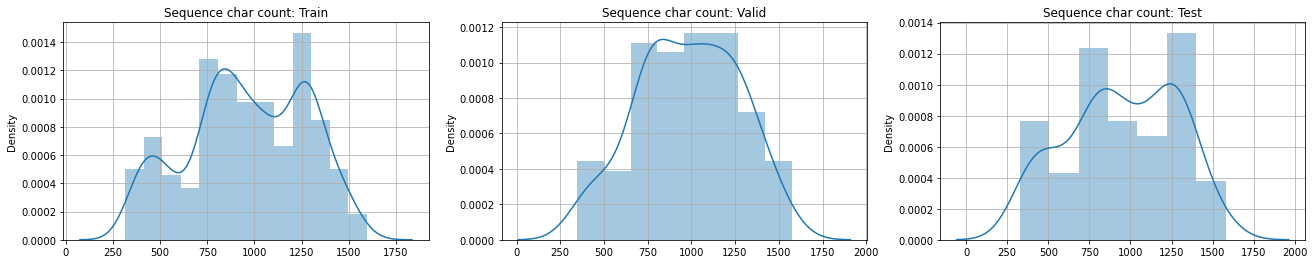

In [16]:
plt.subplot(1, 3, 1)
plot_seq_count(df_train, 'Train')
plt.subplot(1, 3, 2)
plot_seq_count(df_valid, 'Valid')
plt.subplot(1, 3, 3)
plot_seq_count(df_test, 'Test')
plt.subplots_adjust(right=3.0)
plt.show()

## Observation

Most of the unalligned amino acid sequences have character counts in the range of 300 to 1600


## Sequence Code Frequency

Amino acid sequences are represented with their corresponding 1 letter code, for example, code for alanine is
(A), arginine is (R) and so on. The complete list of amino acids with there code can be found here
(http://www.cryst.bbk.ac.uk/education/AminoAcid/the_twenty.html).


In [17]:
def get_code_freq(data, data_name):
  
  data = data.apply(lambda x: " ".join(x))
  
  codes = []
  for i in data: # concatination of all codes
    codes.extend(i)

  codes_dict= Counter(codes)
  codes_dict.pop(' ') # removing white space
  
  print(f'Codes: {data_name}')
  print(f'Total unique codes: {len(codes_dict.keys())}')

  data = pd.DataFrame({'Code': list(codes_dict.keys()), 'Freq': list(codes_dict.values())})
  return data.sort_values('Freq', ascending=False).reset_index()[['Code', 'Freq']]

In [18]:
# train code sequence
train_code_freq = get_code_freq(df_train['sequence'], 'Train')
train_code_freq

Codes: Train
Total unique codes: 21


,Code,Freq
0,L,82077
1,K,73469
2,E,66922
3,S,63255
4,A,55558
5,I,53932
6,D,52667
7,G,52560
8,V,49329
9,T,45975


In [19]:
val_code_freq = get_code_freq(df_valid['sequence'], 'Valid')
val_code_freq

Codes: Valid
Total unique codes: 20


,Code,Freq
0,L,10560
1,K,8833
2,E,8559
3,S,8214
4,A,7114
5,I,6791
6,D,6762
7,G,6759
8,V,6551
9,R,6082


In [20]:
# test code sequence
test_code_freq = get_code_freq(df_test['sequence'], 'Test')
test_code_freq

Codes: Test
Total unique codes: 20


,Code,Freq
0,L,10231
1,K,9019
2,E,8344
3,S,7641
4,A,7227
5,D,6717
6,G,6693
7,I,6635
8,V,6079
9,R,5982


In [21]:
def plot_code_freq(df, data_name):

 plt.title(f'Code frequency: {data_name}')
 sns.barplot(x='Code', y='Freq', data=df)

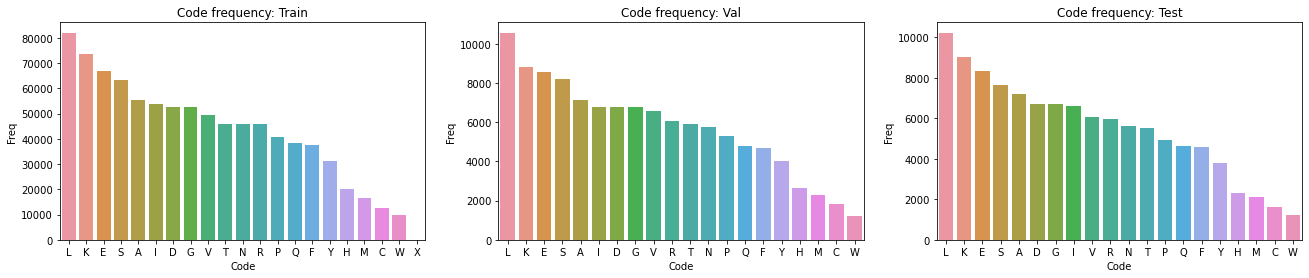

In [22]:
plt.subplot(1, 3, 1)
plot_code_freq(train_code_freq, 'Train')
plt.subplot(1, 3, 2)
plot_code_freq(val_code_freq, 'Val')
plt.subplot(1, 3, 3)
plot_code_freq(test_code_freq, 'Test')
plt.subplots_adjust(right=3.0)
plt.show()

## Observations

Most frequent amino acid code is L followed by K, E, S, A

As we can see, that the uncommon amino acids (i.e., X, U, B, O, Z) are present in very less quantity.
Therefore we can consider only 20 common natural amino acids for sequence encoding.


### Protein families with most sequences(No of Observations)

In [23]:
df_train.groupby('Entry name').size().sort_values(ascending=False).head(20)

Entry name
POL_HV1B1      3
ENPP1_MOUSE    2
POL_HV2D2      2
ERCC5_MOUSE    2
PAN2_HUMAN     2
POL_HV1H2      2
ENPP1_RAT      2
EXO1_HUMAN     2
ENPP1_HUMAN    2
DNA2_HUMAN     2
RAD50_MOUSE    2
RAD50_HUMAN    2
RAD50_DROME    2
RAD50_DICDI    2
FAN1_AILME     2
RECB_ECOLI     2
PMS2_MOUSE     2
RNJ_ARATH      2
GEN_MOUSE      2
FAN1_MOUSE     2
dtype: int64

In [24]:
df_valid.groupby('Entry name').size().sort_values(ascending=False).head(20)

Entry name
A0A017SLR6_9EURO    1
PI5PA_MOUSE         1
RECB_MYCTO          1
RECB_MYCS2          1
RECB_CHLTR          1
RECB_BORBU          1
RAG1_XENLA          1
RAG1_PIG            1
RAD50_RAT           1
RAD50_CAEEL         1
POL_JEMBR           1
POL_FFV             1
POLR1_ARATH         1
PMS2_HUMAN          1
PAN2_YEAST          1
MAP21_ASPFU         1
PAN2_DROME          1
PAN2_CHATD          1
NAS7_CAEEL          1
MUTS2_STAHJ         1
dtype: int64

In [25]:
df_test.groupby('Entry name').size().sort_values(ascending=False).head(20)

Entry name
DPOL_HHV11          2
RRP44_YEAST         2
A0A061G0K3_THECC    1
MUS81_HUMAN         1
PNPT1_HUMAN         1
PAN2_MOUSE          1
NBN_RAT             1
NAS31_CAEEL         1
MUTS2_STRSV         1
MUTS2_STAAM         1
MUTS2_LACP7         1
MUTS2_LACBA         1
MUTS2_CALBD         1
MUTS2_BACSU         1
MUTS2_ALKOO         1
MAP2_KOMPG          1
MORC4_ARATH         1
POL_HV192           1
MAP2_CANAW          1
MAP22_ASPFU         1
dtype: int64

### Considering 1000 Classes based on no. of Obsevations

In [26]:
# Considering top 1000 classes based on most observations because of limited computational
classes = df_train['Entry name'].value_counts()[:1000].index.tolist()
len(classes)

911

In [27]:
# Filtering data based on considered 1000 classes.
train_sm = df_train.loc[df_train['Entry name'].isin(classes)].reset_index()
val_sm = df_valid.loc[df_valid['Entry name'].isin(classes)].reset_index()
test_sm = df_test.loc[df_test['Entry name'].isin(classes)].reset_index()
print('Data size after considering 1000 classes for each data split:')
print('Train size :', len(train_sm))
print('Valid size :', len(val_sm))
print('Test size :', len(test_sm))


Data size after considering 1000 classes for each data split:
Train size : 932
Valid size : 8
Test size : 7


In [28]:
calc_unique_cls(train_sm, test_sm, val_sm)


Number of unique classes in Train:  911
Number of unique classes in Val:  117
Number of unique classes in Test:  8


## Deep Processing Models

### Text Preprocessing

In [29]:
codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

def create_dict(codes):
  char_dict = {}
  for index, val in enumerate(codes):
    char_dict[val] = index+1

  return char_dict

char_dict = create_dict(codes)

print(char_dict)
print("Dict Length:", len(char_dict))

{'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20}
Dict Length: 20


In [30]:
def integer_encoding(data):
  """
  - Encodes code sequence to integer values.
  - 20 common amino acids are taken into consideration
    and rest 4 are categorized as 0.
  """
  
  encode_list = []
  for row in data['sequence'].values:
    row_encode = []
    for code in row:
      row_encode.append(char_dict.get(code, 0))
    encode_list.append(np.array(row_encode))
  
  return encode_list

In [31]:
train_encode = integer_encoding(train_sm)
val_encode = integer_encoding(val_sm)
test_encode = integer_encoding(test_sm) 

In [32]:
max_length = 100
train_pad = pad_sequences(train_encode, maxlen=max_length, padding='post', truncating='post')
val_pad = pad_sequences(val_encode, maxlen=max_length, padding='post', truncating='post')
test_pad = pad_sequences(test_encode, maxlen=max_length, padding='post', truncating='post')


In [33]:
# One hot encoding of sequences
train_ohe = to_categorical(train_pad)
val_ohe = to_categorical(val_pad)
test_ohe = to_categorical(test_pad)
train_ohe.shape, test_ohe.shape, val_ohe.shape

((932, 100, 21), (7, 100, 21), (8, 100, 21))

In [34]:
# label/integer encoding output variable: (y)
le = LabelEncoder()
y_train_le = le.fit_transform(train_sm['Entry name'])
y_val_le = le.fit_transform(val_sm['Entry name'])
y_test_le = le.fit_transform(test_sm['Entry name'])
y_train_le.shape,  y_val_le.shape, y_test_le.shape

((932,), (8,), (7,))

In [35]:
print('Total classes: ', len(le.classes_))
# le.classes_


Total classes:  7


In [36]:
# One hot encoding of outputs
y_train = to_categorical(y_train_le)
y_valid = to_categorical(y_val_le)
y_test = to_categorical(y_test_le)
y_train.shape, y_valid.shape, y_test.shape

((932, 911), (8, 8), (7, 7))

In [37]:
# Utility function: plot model's accuracy and loss
# https://realpython.com/python-keras-text-classification/
plt.style.use('ggplot')
def plot_history(history):
 acc = history.history['acc']
 val_acc = history.history['val_acc']
 loss = history.history['loss']
 val_loss = history.history['val_loss']
 x = range(1, len(acc) + 1)
 plt.figure(figsize=(12, 5))
 plt.subplot(1, 2, 1)
 plt.plot(x, acc, 'b', label='Training acc')
 plt.plot(x, val_acc, 'r', label='Validation acc')
 plt.title('Training and validation accuracy')
 plt.legend()
 plt.subplot(1, 2, 2)
 plt.plot(x, loss, 'b', label='Training loss')
 plt.plot(x, val_loss, 'r', label='Validation loss')
 plt.title('Training and validation loss')
 plt.legend()

In [38]:
# Utility function: Display model score(Loss & Accuracy) across all sets.
def display_model_score(model, train, val, test, batch_size):
 train_score = model.evaluate(train[0], train[1], batch_size=batch_size, verbose=1)
 print('Train loss: ', train_score[0])
 print('Train accuracy: ', train_score[1])
 print('-'*70)
    
 val_score = model.evaluate(val[0], val[1], batch_size=batch_size, verbose=1)
 print('Val loss: ', val_score[0])
 print('Val accuracy: ', val_score[1])
 print('-'*70)

 test_score = model.evaluate(test[0], test[1], batch_size=batch_size, verbose=1)
 print('Test loss: ', test_score[0])
 print('Test accuracy: ', test_score[1])

In [39]:
df_train=np.asarray(df_train).astype(np.float32)
df_train=np.asarray(df).astype(np.float32)

ValueError: could not convert string to float: 'A0A2T2QW30'

## Model 1. Bidirectional LSTM 

In [40]:
x_input = Input(shape=(100,))
emb = Embedding(21, 128, input_length=max_length)(x_input)
bi_rnn = Bidirectional(CuDNNLSTM(64, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))(emb)
x = Dropout(0.3)(bi_rnn)

# softmax classifier
x_output = Dense(801, activation='softmax')(x)

model1 = Model(inputs=x_input, outputs=x_output)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 128)          2688      
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               99328     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 801)               103329    
Total params: 205,345
Trainable params: 205,345
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Early Stopping
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [66]:
history1 = model1.fit(
train_pad, df_train,
epochs=50, batch_size=256,
validation_data=(val_pad, df_valid),
callbacks=[es]
)

'history1 = model1.fit(\ntrain_pad, df_train,\nepochs=50, batch_size=256,\nvalidation_data=(val_pad, df_valid),\ncallbacks=[es]\n)'

In [ ]:
# saving model weights.
model1.save_weights('C:/Users/Sachin KGS/Desktop/Data/model1.h5')

In [68]:
plot_history(history1)

In [ ]:
display_model_score(model1,
 [train_pad, df_train],
 [val_pad, df_valid],
 [test_pad, df_test],
 256)

## Model 2: ProtCNN

In [61]:
def residual_block(data, filters, d_rate):
  """
  _data: input
  _filters: convolution filters
  _d_rate: dilation rate
  """

  shortcut = data

  bn1 = BatchNormalization()(data)
  act1 = Activation('relu')(bn1)
  conv1 = Conv1D(filters, 1, dilation_rate=d_rate, padding='same', kernel_regularizer=l2(0.001))(act1)

  #bottleneck convolution
  bn2 = BatchNormalization()(conv1)
  act2 = Activation('relu')(bn2)
  conv2 = Conv1D(filters, 3, padding='same', kernel_regularizer=l2(0.001))(act2)

  #skip connection
  x = Add()([conv2, shortcut])

  return x

In [62]:
# model
x_input = Input(shape=(100, 21))
#initial conv
conv = Conv1D(128, 1, padding='same')(x_input)
# per-residue representation
res1 = residual_block(conv, 128, 2)
res2 = residual_block(res1, 128, 3)
x = MaxPooling1D(3)(res2)
x = Dropout(0.5)(x)
# softmax classifier
x = Flatten()(x)
x_output = Dense(1000, activation='softmax', kernel_regularizer=l2(0.0001))(x)
model2 = Model(inputs=x_input, outputs=x_output)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 21)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 100, 128)     2816        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 100, 128)     512         conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 100, 128)     0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [ ]:
# Early Stopping
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [ ]:
history2 = model2.fit(
 train_ohe, df_train,
 epochs=10, batch_size=256,
 validation_data=(val_ohe, df_valid),
 callbacks=[es]
 )


In [ ]:
plot_history(history2)

In [ ]:
display_model_score(
 model2,
 [train_ohe, df_train],
 [val_ohe, df_valid],
 [test_ohe, df_test],
 256)

## 5. Conclusion 

In [60]:
x = PrettyTable()
x.field_names = ['Sr.no', 'Model', 'Train Acc', 'Val Acc','Test Acc']
x.add_row(['1.', 'Bidirectional LSTM', '0.964', '0.957', '0.958'])
x.add_row(['2.', 'ProtCNN', '0.996', '0.988', '0.988'])
print(x)

+-------+--------------------+-----------+---------+----------+
| Sr.no |       Model        | Train Acc | Val Acc | Test Acc |
+-------+--------------------+-----------+---------+----------+
|   1.  | Bidirectional LSTM |   0.964   |  0.957  |  0.958   |
|   2.  |      ProtCNN       |   0.996   |  0.988  |  0.988   |
+-------+--------------------+-----------+---------+----------+


## 6. Acknowledgement

This project is to fulfill a requirement of IE 6318-001 Data Mining and Analytics course in the university of Texas at Arlington. I would like to thank Dr. Shouyi Wang and Linh Ho Manh for the guidance and support throughout the project.


## 7. Reference

1. https://www.biorxiv.org/content/10.1101/626507v2.full
2. https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/
3.https://zhanggroup.org/FASTA/#:~:text=What%20is%20FASTA%20format%3F,by%20lines%20of%20sequence%20data.